## reading in data and importing things

In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from collections import OrderedDict
import seaborn as sns
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math

## fitting Kd

log(Kd): -8.584690936326968+/- 0.6126416368305736
r^2: 0.8162023071225495
rms error in fit: 0.5447697482276477


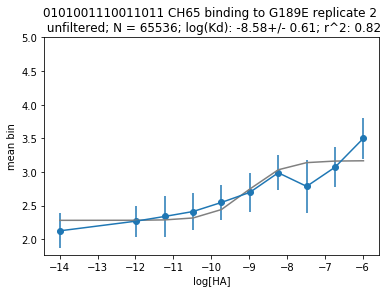

In [16]:
#pick a variant to plot
variant = "0101001110011011"
antigen = "G189E"
replicate = "2"

##################################
#grabbing the data
if antigen == "MA90":
    if replicate == "1":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65a_f3rem.csv',delimiter=',',dtype={'geno': str}))
    if replicate == "2":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65b.tsv',delimiter='\t',dtype={'geno': str}))
    errors = meanbin_err[['geno','std_log10PE1', 'std_log10PE2', 'std_log10PE3', 'std_log10PE4', 'std_log10PE5', 'std_log10PE6', 'std_log10PE7', 'std_log10PE8', 'std_log10PE9','std_log10PE0']].copy()
    meanbins_toplot = meanbins.set_index('geno').transpose()
    errors_toplot = errors.set_index('geno').transpose()
    meanbins_toplot['concentration'] = (-5.99, -6.74, -7.49, -8.24, -8.99, -9.74, -10.49, -11.24, -11.99,-14)
    errors_toplot['concentration'] = (-5.99, -6.74, -7.49, -8.24, -8.99, -9.74, -10.49, -11.24, -11.99,-14)
if antigen == "SI06":
    if replicate == "1":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65d.tsv',delimiter='\t',dtype={'geno': str}))
    if replicate == "2":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65e.tsv',delimiter='\t',dtype={'geno': str}))
        meanbins = meanbin_err[['geno','mean_log10PE1', 'mean_log10PE2', 'mean_log10PE3', 'mean_log10PE4', 'mean_log10PE5', 'mean_log10PE6', 'mean_log10PE7', 'mean_log10PE8', 'mean_log10PE9', 'mean_log10PE0']].copy()
    errors = meanbin_err[['geno','std_log10PE1', 'std_log10PE2', 'std_log10PE3', 'std_log10PE4', 'std_log10PE5', 'std_log10PE6', 'std_log10PE7', 'std_log10PE8', 'std_log10PE9','std_log10PE0']].copy()
    meanbins_toplot = meanbins.set_index('geno').transpose()
    errors_toplot = errors.set_index('geno').transpose()
    meanbins_toplot['concentration'] = (-6.04, -6.79, -7.54, -8.29, -9.04, -9.79, -10.54, -11.29, -12.04,-14)
    errors_toplot['concentration'] = (-6.04, -6.79, -7.54, -8.29, -9.04, -9.79, -10.54, -11.29, -12.04,-14)
if antigen == "G189E":
    if replicate == "1":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65g.tsv',delimiter='\t',dtype={'geno': str}))
    if replicate == "2":
        meanbin_err = pd.DataFrame(pd.read_csv('Kds_CH65h.tsv',delimiter='\t',dtype={'geno': str}))
    meanbins = meanbin_err[['geno','mean_log10PE1', 'mean_log10PE2', 'mean_log10PE3', 'mean_log10PE4', 'mean_log10PE5', 'mean_log10PE6', 'mean_log10PE7', 'mean_log10PE8', 'mean_log10PE9', 'mean_log10PE0']].copy()
    errors = meanbin_err[['geno','std_log10PE1', 'std_log10PE2', 'std_log10PE3', 'std_log10PE4', 'std_log10PE5', 'std_log10PE6', 'std_log10PE7', 'std_log10PE8', 'std_log10PE9','std_log10PE0']].copy()
    meanbins_toplot = meanbins.set_index('geno').transpose()
    errors_toplot = errors.set_index('geno').transpose()
    meanbins_toplot['concentration'] = (-5.98, -6.73, -7.48, -8.23, -8.98, -9.73, -10.48, -11.23, -11.98,-14)
    errors_toplot['concentration'] = (-5.98, -6.73, -7.48, -8.23, -8.98, -9.73, -10.48, -11.23, -11.98,-14)

#plotting with error
# define function
def fun(c, Kd, A, B):
    return np.log10(A * (10**c/((10**c)+(10**Kd))) + B)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

#define data
concentrations = meanbins_toplot["concentration"].values
bins_mean = meanbins_toplot[variant].values
error = errors_toplot[variant].values
y = bins_mean + error

# plot data
plt.scatter(concentrations,bins_mean, label="data")
plt.errorbar(concentrations,bins_mean, yerr=error)

#fit
popt, pcov = scipy.optimize.curve_fit(fun,concentrations,
                                          bins_mean,
                                          p0=[(-9),10**(4),10**(1)],
                                          sigma=error, absolute_sigma=True,
                                          bounds = [((-14),1,1),((-5),10**(5),10**(5))],
                                          maxfev=400000)
yfit = fun(concentrations,*popt)
err = 1 - np.sum((fun(concentrations, *popt) - bins_mean)**2)/np.sum((bins_mean - bins_mean.mean())**2)
plt.plot(concentrations,fun(concentrations,*popt), label="fit", color="gray")
perr = np.sqrt(np.diag(pcov))[0]
print('log(Kd): '+str(popt[0])+'+/- '+str(perr))
print('r^2: '+str(err))
title = "%s CH65 binding to %s replicate %s \n unfiltered; N = " % (variant, antigen, replicate) +str(meanbins.shape[0])+"; log(Kd): "+str(round(popt[0],2))+'+/- '+str(round(perr,2))+"; r^2: "+str(round(err,2))
plt.xlabel("log[HA]")
plt.ylim(top=5)
plt.ylabel("mean bin")
plt.title(title)
#plt.savefig('plots/%s_%s_%s.png'% (variant,antigen,replicate), dpi=600)
print('rms error in fit:', rms(bins_mean, yfit))